In [140]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [141]:
gRandState = 42

In [167]:
def standardardized_data(data):
    return StandardScaler().fit_transform(data)

def get_eigenvalues(data, std_data, num_comp):
    eigenValues = []
    pca = PCA(n_components=num_comp, random_state=gRandState, whiten=True)
    pca.fit(std_data)
    n_samples = std_data.shape[0]
    # We center the data and compute the sample covariance matrix.
    data -= np.mean(std_data, axis=0)
    cov_matrix = np.dot(std_data.T, std_data) / n_samples
    for eigenvector in pca.components_:
        eigenValues.append(float("%.4f"%np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))))
    return np.array(eigenValues)

def get_eigenvectors(std_data, num_comp):
    pca = PCA(n_components=num_comp, random_state=gRandState, whiten=True)
    pca.fit(std_data)
    return pca.components_.T

def get_correlations(data):
    return pd.DataFrame(data).corr(method='pearson')


def print_scree_plot(eigvals, num_vars):
    fig = plt.figure(figsize=(8,5))
    sing_vals = np.arange(num_vars) + 1
    plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    #I don't like the default legend so I typically make mine like below, e.g.
    #with smaller fonts and a bit transparent so I do not cover up data, and make
    #it moveable by the viewer in case upper-right is a bad place for it 
    plt.show()
    
def get_loading_matrix(std_data):
    pca = PCA(n_components=5, random_state=42, whiten=True)
    pca.fit(X_std)
    return pca.components_.T * np.sqrt(pca.explained_variance_)


In [143]:
df = pd.read_excel("USFoodPrice.xlsx")

In [144]:
df = df.dropna()
X = df.iloc[::, 1:6].values
Y = df.iloc[::, 0].values

In [145]:
X_std = standardardized_data(X)

In [146]:
print(get_eigenvalues(X, X_std, 5))

[2.4225 1.1047 0.7385 0.4936 0.2408]


In [147]:
print(get_eigenvectors( X_std, 5))

[[ 0.49614868  0.30861972 -0.38639398 -0.50930459 -0.49989887]
 [ 0.57570231  0.04380176 -0.26247227  0.02813712  0.77263501]
 [ 0.33956956  0.43080905  0.83463952 -0.0491      0.00788224]
 [ 0.22498981 -0.79677694  0.29160659 -0.47901574 -0.0059668 ]
 [ 0.50643404 -0.28702846 -0.01226602  0.71270629 -0.39120139]]


In [148]:
print(get_correlations(X))

          0         1         2         3         4
0  1.000000  0.681700  0.328239  0.036709  0.382241
1  0.681700  1.000000  0.333422  0.210937  0.631898
2  0.328239  0.333422  1.000000 -0.002779  0.254417
3  0.036709  0.210937 -0.002779  1.000000  0.358061
4  0.382241  0.631898  0.254417  0.358061  1.000000


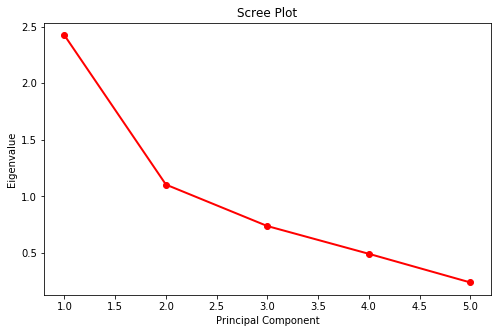

In [149]:
print_scree_plot(get_eigenvalues(X, X_std, 5), 5)

In [150]:
def pca_plot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    fig = plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.grid()
    plt.scatter(xs ,ys )
    
    plt.subplot(1, 2, 2)
    # theta goes from 0 to 2pi
    theta = np.linspace(0, 2*np.pi, 100)

    # the radius of the circle
    r = np.sqrt(1)
    # compute x1 and x2
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.05, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.gca().invert_yaxis()
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


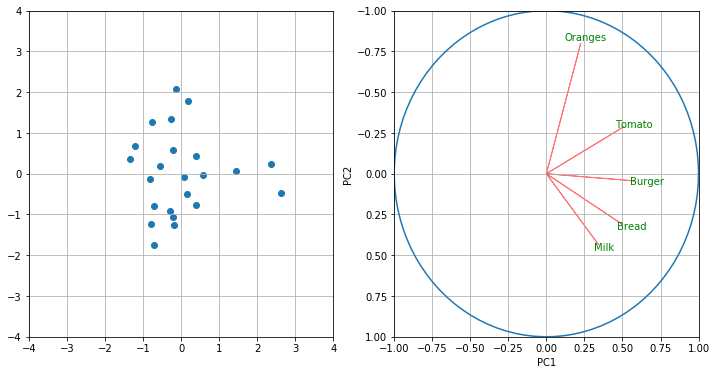

In [151]:
pca = PCA(n_components=5, random_state=gRandState, whiten=True)

x_new = pca.fit_transform(X_std)

pca_plot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), df.columns[1:].values)

In [168]:
get_loading_matrix(x_new)

array([[ 0.78957509,  0.3316603 , -0.33950991, -0.36586657, -0.2508024 ],
       [ 0.91617739,  0.04707186, -0.23062455,  0.02021272,  0.38763583],
       [ 0.54039379,  0.46297191,  0.73336647, -0.03527172,  0.00395457],
       [ 0.35805064, -0.85626182,  0.25622379, -0.34410811, -0.00299358],
       [ 0.80594329, -0.3084571 , -0.01077769,  0.51198321, -0.19626819]])

In [1]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(pd.DataFrame(X), 2, method='ml', rotation='varimax')
fa.loadings

ModuleNotFoundError: No module named 'factor_analyzer'

In [163]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(pd.DataFrame(X_std), 2, method='ml', rotation='varimax')
fa.loadings

,Factor1,Factor2
0,0.865063,0.027729
1,0.773980,0.407529
2,0.379074,0.107599
3,0.023743,0.460262
4,0.418798,0.757233
